In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import numpy
import torch.utils.data
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('CPU is available')

CPU is available


In [3]:
import sys
sys.path.append('../..')
import seaborn as sns

from reservoirgrid.datasets import LorenzAttractor
from reservoirgrid.datasets import MackeyGlassDataset
from mpl_toolkits.mplot3d import Axes3D

In [4]:
!pwd

/home/ragedpi/Reservoir_Pytorch/Examples/Nifty50


In [5]:
# 'your_file.csv' with the path to your CSV file
features = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']
df = pd.read_csv('../../reservoirgrid/datasets/ADANIPORTS.csv')

In [6]:
df[features] = df[features].astype(float)
Dataset = df[features].values
Dataset_log = np.log(Dataset[1:] / Dataset[:-1])

In [7]:
train, test = train_test_split(Dataset, test_size=0.01, shuffle=False)
train_log, test_log = train_test_split(Dataset_log, test_size=0.01, shuffle=False)
train.shape , test.shape

((3288, 6), (34, 6))

In [8]:
# train_inputs = train[:-1]
# train_targets = train[1:]
# train_inputs = torch.tensor(train_inputs, dtype=torch.float32).to(device)
# train_targets = torch.tensor(train_targets, dtype=torch.float32).to(device)

In [9]:
train_inputs_log = train_log[:-1]
train_targets_log = train_log[1:]
train_inputs_log = torch.tensor(train_inputs_log, dtype=torch.float32).to(device)
train_targets_log = torch.tensor(train_targets_log, dtype=torch.float32).to(device)

In [10]:
train_inputs_log.shape, train_targets_log.shape

(torch.Size([3286, 6]), torch.Size([3286, 6]))

In [12]:
from reservoirgrid.models import Reservoir

In [ ]:
# Resnifty = Reservoir(
    # input_dim=6, 
    # reservoir_dim=500, 
    # output_dim=6, 
    # spectral_radius=0.90, 
    # leak_rate=0.3, 
    # sparsity=0.5, 
    # input_scaling=0.5
# )

# Resnifty.to(device)

In [13]:
Resnifty_log = Reservoir(
    input_dim=6,                
    reservoir_dim=500,          
    output_dim=6,               
    spectral_radius=0.95,       
    leak_rate=0.1,              
    sparsity=0.5,               
    input_scaling=0.5           
)

Resnifty_log.to(device)


Reservoir(
  (readout): Linear(in_features=500, out_features=6, bias=True)
)

In [ ]:
# Resnifty.train_readout(train_inputs, train_targets)
# predictions = Resnifty.predict(train_inputs, steps=34)

In [ ]:
# plt.plot(test[:,3], label='True')
# plt.plot(predictions[:,3], label='Predicted')
# plt.legend()

In [ ]:
# Resnifty_log.freeze_reservoir()
# losses = Resnifty_log.Train(dataset = train_inputs_log, 
                #    targets = train_targets_log, 
                #    epochs=100, 
                #    lr=0.05)

In [ ]:
#plt.plot(losses.detach().numpy())

Readout training complete.


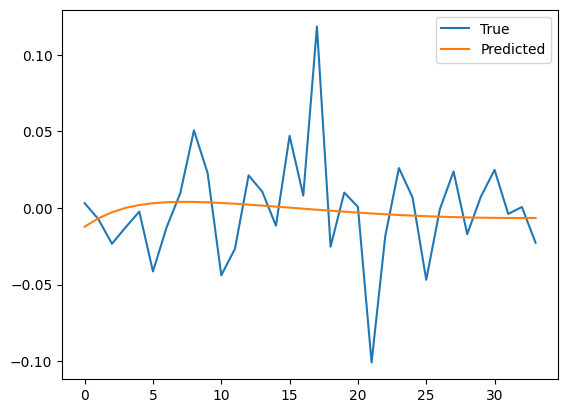

In [14]:
Resnifty_log.train_readout(train_inputs_log, train_targets_log)
predictions_log = Resnifty_log.predict(train_inputs_log, steps=34)
plt.plot(test_log[:,3], label='True')
plt.plot(predictions_log[:,3], label='Predicted')
plt.legend()

In [19]:
from reservoirgrid.helpers import reservoir_tests

In [20]:
reservoir_tests.Test_lyapunov(Resnifty_log)

AttributeError: 'Reservoir' object has no attribute 'reservoir_states'

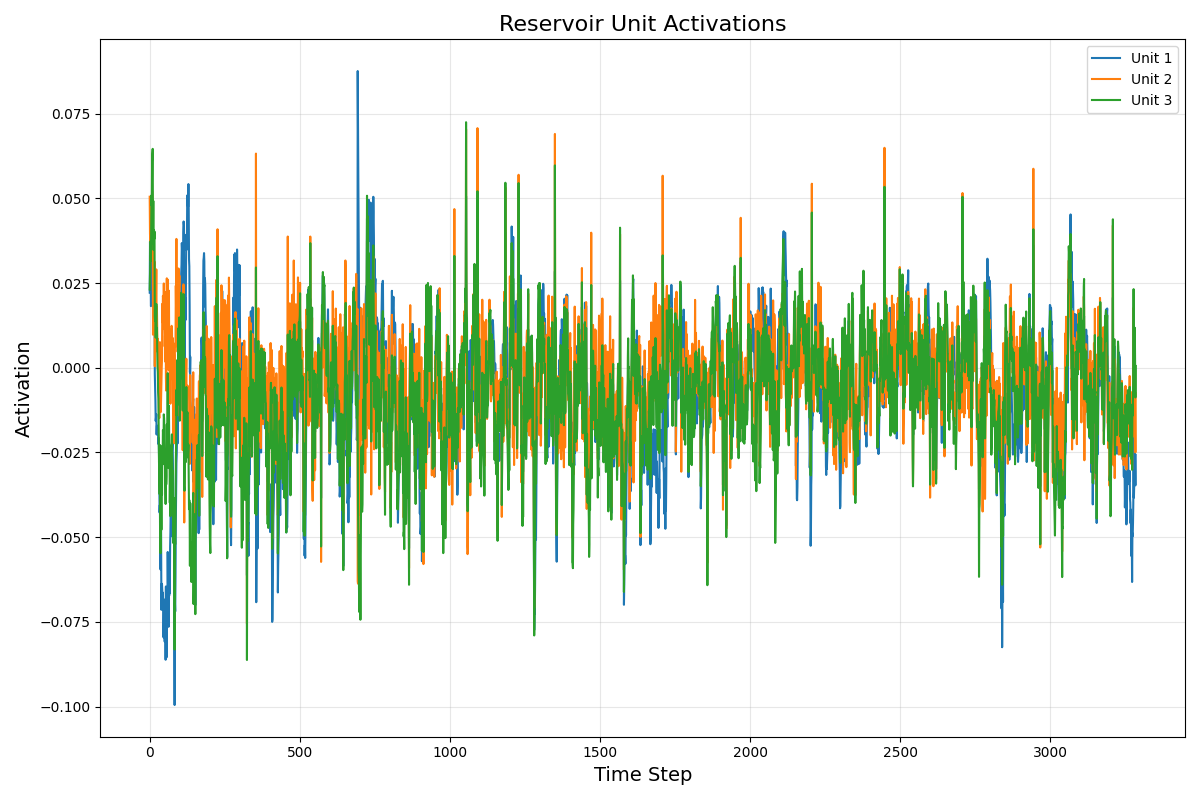

In [ ]:
%matplotlib widget
Testers.visualize_reservoir_states(Resnifty_log)

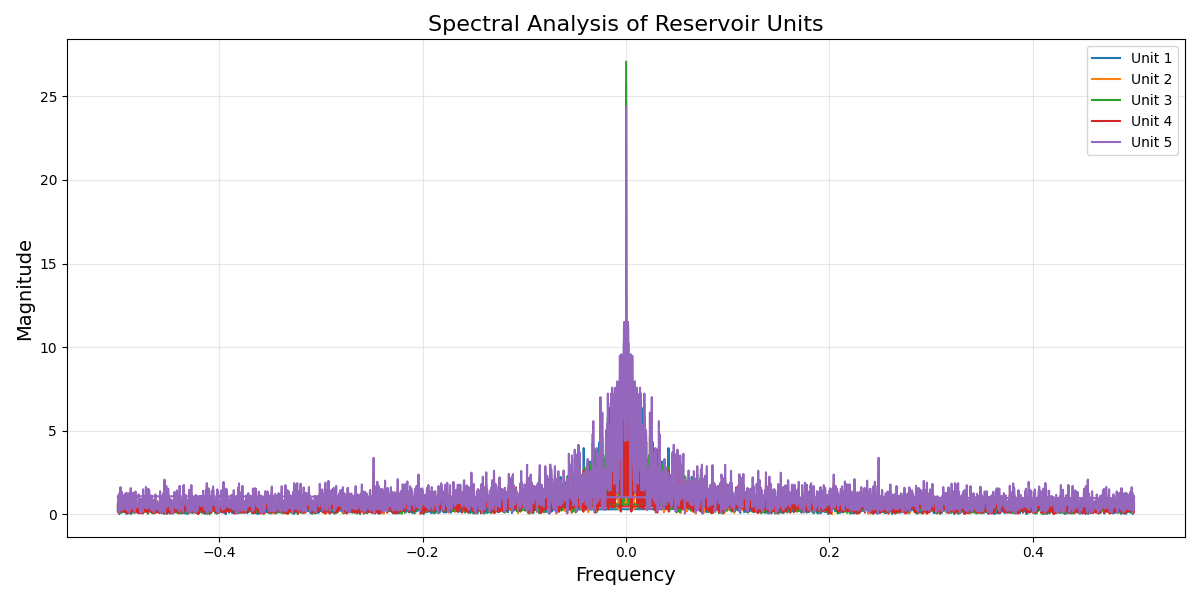

In [ ]:
Testers.spectral_analysis(Resnifty_log, input_signal=train_inputs_log)

In [ ]:
Testers.test_nonlinearity(Resnifty_log)

TypeError: 'int' object is not callable